In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Pakistan,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,2,Australia,Pakistan,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,2,Australia,Pakistan,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,2,Australia,Pakistan,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,2,Australia,Pakistan,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,0,NaN,Pallekele International Cricket Stadium
245,1795,Sri Lanka,Australia,39.6,0,0,NaN,Pallekele International Cricket Stadium
246,1795,Sri Lanka,Australia,39.7,1,0,NaN,Pallekele International Cricket Stadium
247,1795,Sri Lanka,Australia,40.1,0,0,NaN,Pallekele International Cricket Stadium


In [4]:
df.isnull().sum()

match_id                0
batting_team            0
bowling_team            0
ball                    0
runs                    0
player_dismissed        0
city                61235
venue                   0
dtype: int64

In [5]:
df[df['city'].isnull()]['venue'].value_counts()

Sydney Cricket Ground                      10217
Rangiri Dambulla International Stadium     10051
Melbourne Cricket Ground                    8696
Adelaide Oval                               7725
Dubai International Cricket Stadium         6314
Pallekele International Cricket Stadium     6170
Sharjah Cricket Stadium                     4658
Harare Sports Club                          2432
Multan Cricket Stadium                      1199
Queenstown Events Centre                     909
Chittagong Divisional Stadium                900
Rawalpindi Cricket Stadium                   617
Perth Stadium                                526
Dubai Sports City Cricket Stadium            518
Sharjah Cricket Association Stadium          303
Name: venue, dtype: int64

In [6]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [7]:
df['city'] = cities

In [8]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Pakistan,0.1,0,0,Brisbane
1,2,Australia,Pakistan,0.2,0,0,Brisbane
2,2,Australia,Pakistan,0.3,0,0,Brisbane
3,2,Australia,Pakistan,0.4,0,0,Brisbane
4,2,Australia,Pakistan,0.5,1,0,Brisbane
...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,0,Pallekele
245,1795,Sri Lanka,Australia,39.6,0,0,Pallekele
246,1795,Sri Lanka,Australia,39.7,1,0,Pallekele
247,1795,Sri Lanka,Australia,40.1,0,0,Pallekele


In [11]:
df.city.unique()

array(['Brisbane', 'Melbourne', 'Perth', 'Sydney', 'Adelaide', 'Canberra',
       'Christchurch', 'Nelson', 'Auckland', 'Hamilton', 'Wellington',
       'London', 'Birmingham', 'Cardiff', 'Antigua', 'Barbados', 'Mirpur',
       'Chittagong', 'Dharmasala', 'Delhi', 'Chandigarh', 'Ranchi',
       'Visakhapatnam', 'Leeds', 'Southampton', 'Manchester',
       'Nottingham', 'Bristol', 'Dublin', 'Pune', 'Cuttack', 'Kolkata',
       'Sharjah', 'Abu Dhabi', 'Harare', 'Bulawayo', 'Kimberley', 'Paarl',
       'East London', 'Guyana', 'Rangiri', 'Colombo', 'St Lucia',
       'Trinidad', 'Jamaica', 'Pallekele', 'Mount Maunganui', 'Dunedin',
       'Whangarei', 'Indore', 'Bengaluru', 'Nagpur', 'Chester-le-Street',
       'Mumbai', 'Kanpur', 'Dubai', 'Durban', 'Centurion', 'Cape Town',
       'Johannesburg', 'Port Elizabeth', 'Dharamsala', 'Dhaka', 'Taunton',
       'Hobart', 'St Kitts', 'Sylhet', 'Napier', 'Guwahati',
       'Thiruvananthapuram', 'Bridgetown', "St George's", 'Gros Islet',
       'H

In [12]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 1500].index.tolist()
eligible_cities

['Mirpur',
 'London',
 'Colombo',
 'Sydney',
 'Abu Dhabi',
 'Rangiri',
 'Melbourne',
 'Centurion',
 'Adelaide',
 'Perth',
 'Birmingham',
 'Dubai',
 'Auckland',
 'Johannesburg',
 'Wellington',
 'Brisbane',
 'Pallekele',
 'Cardiff',
 'Manchester',
 'Nottingham',
 'Southampton',
 'Durban',
 'Hamilton',
 'Sharjah',
 'Port Elizabeth',
 'Cape Town',
 'Christchurch',
 'Antigua',
 'Leeds',
 'Chandigarh',
 'Karachi',
 'Guyana',
 'Trinidad',
 'Napier',
 'St Lucia',
 'Hambantota',
 'Mumbai',
 'Jamaica',
 'St Kitts',
 'Chester-le-Street',
 'Barbados',
 'Hobart',
 'Lahore',
 'Delhi',
 'Ahmedabad',
 'Grenada',
 'Mount Maunganui',
 'Nagpur',
 'Visakhapatnam',
 'Jaipur',
 'Chennai',
 'Chittagong',
 'Harare',
 'Fatullah',
 'Bristol',
 'Nelson',
 'Dunedin',
 'Rajkot',
 'Kolkata',
 'Canberra',
 'Hyderabad',
 'Kanpur',
 'Cuttack',
 'Kuala Lumpur',
 'Dhaka',
 'Indore',
 'Bloemfontein',
 'Pune']

In [13]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

In [14]:
df.head(10)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1
5,2,Australia,Pakistan,0.6,0,0,Brisbane,1
6,2,Australia,Pakistan,0.7,0,0,Brisbane,1
7,2,Australia,Pakistan,1.1,0,0,Brisbane,1
8,2,Australia,Pakistan,1.2,1,0,Brisbane,2
9,2,Australia,Pakistan,1.3,0,0,Brisbane,2


In [15]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5
...,...,...,...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,0,Pallekele,194,39,5
245,1795,Sri Lanka,Australia,39.6,0,0,Pallekele,194,39,6
246,1795,Sri Lanka,Australia,39.7,1,0,Pallekele,195,39,7
247,1795,Sri Lanka,Australia,40.1,0,0,Pallekele,195,40,1


In [16]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df.head(10)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5
5,2,Australia,Pakistan,0.6,0,0,Brisbane,1,0,6,6
6,2,Australia,Pakistan,0.7,0,0,Brisbane,1,0,7,7
7,2,Australia,Pakistan,1.1,0,0,Brisbane,1,1,1,7
8,2,Australia,Pakistan,1.2,1,0,Brisbane,2,1,2,8
9,2,Australia,Pakistan,1.3,0,0,Brisbane,2,1,3,9


In [17]:
df['balls_left'] = 300 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,0,Pallekele,194,39,5,239,61
245,1795,Sri Lanka,Australia,39.6,0,0,Pallekele,194,39,6,240,60
246,1795,Sri Lanka,Australia,39.7,1,0,Pallekele,195,39,7,241,59
247,1795,Sri Lanka,Australia,40.1,0,0,Pallekele,195,40,1,241,59


In [18]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

In [19]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,9,Pallekele,194,39,5,239,61,1
245,1795,Sri Lanka,Australia,39.6,0,9,Pallekele,194,39,6,240,60,1
246,1795,Sri Lanka,Australia,39.7,1,9,Pallekele,195,39,7,241,59,1
247,1795,Sri Lanka,Australia,40.1,0,9,Pallekele,195,40,1,241,59,1


In [20]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [21]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10,0.000000
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10,0.000000
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10,0.000000
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10,0.000000
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,9,Pallekele,194,39,5,239,61,1,4.870293
245,1795,Sri Lanka,Australia,39.6,0,9,Pallekele,194,39,6,240,60,1,4.850000
246,1795,Sri Lanka,Australia,39.7,1,9,Pallekele,195,39,7,241,59,1,4.854772
247,1795,Sri Lanka,Australia,40.1,0,9,Pallekele,195,40,1,241,59,1,4.854772


In [22]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [23]:
df['last_five'] = last_five

In [24]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10,0.000000,NaN
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10,0.000000,NaN
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10,0.000000,NaN
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10,0.000000,NaN
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1795,Sri Lanka,Australia,39.5,0,9,Pallekele,194,39,5,239,61,1,4.870293,24.0
245,1795,Sri Lanka,Australia,39.6,0,9,Pallekele,194,39,6,240,60,1,4.850000,23.0
246,1795,Sri Lanka,Australia,39.7,1,9,Pallekele,195,39,7,241,59,1,4.854772,24.0
247,1795,Sri Lanka,Australia,40.1,0,9,Pallekele,195,40,1,241,59,1,4.854772,23.0


In [25]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [26]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [27]:
final_df.dropna(inplace=True)

In [28]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [29]:
final_df = final_df.sample(final_df.shape[0])

In [30]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
23281,Sri Lanka,Bangladesh,Colombo,119,171,8,5.534884,28.0,280
313258,Sri Lanka,Bangladesh,Melbourne,118,159,10,5.021277,35.0,332


In [31]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
212763,England,Bangladesh,Chittagong,274,4,5,5.554054,57.0
325368,England,India,Birmingham,35,220,7,2.625000,12.0
302053,West Indies,Pakistan,St Lucia,86,157,8,3.608392,21.0
131672,New Zealand,Sri Lanka,Mumbai,61,187,7,3.238938,16.0
321195,Pakistan,Sri Lanka,Dubai,181,72,7,4.763158,26.0
...,...,...,...,...,...,...,...,...
29070,New Zealand,West Indies,Christchurch,314,6,5,6.408163,66.0
123591,Sri Lanka,New Zealand,Jamaica,121,134,7,4.373494,18.0
61233,Pakistan,England,London,17,262,9,2.684211,12.0
170599,India,Pakistan,Karachi,232,59,6,5.775934,20.0


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import f1_score

In [34]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [35]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [113]:
#pipe.fit(X_train,y_train)
#y_pred = pipe.predict(X_test)
#y1_pred = pipe.predict(X_train)
#y_pred=np.argmax(y_pred,axis=0)
#y_test=np.argmax(y_test,axis=0)
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y1_pred))

#print(mean_absolute_error(y_test,y_pred))

0.9902957795245215
0.9993035232975008


In [111]:
print(y_test)

34372     280
120495    247
130717    195
191676    332
235012    286
         ... 
65555     222
155225     83
339619    217
126298    343
233847    223
Name: runs_x, Length: 68592, dtype: int64


In [42]:
final_df.describe()

,current_score,balls_left,wickets_left,crr,last_five,runs_x
count,342960.000000,342960.000000,342960.000000,342960.000000,342960.000000,342960.000000
mean,128.762920,140.570994,6.798921,4.749144,25.640693,259.399586
std,73.817282,77.386144,2.184969,1.121174,10.143119,60.811572
min,2.000000,0.000000,0.000000,0.352941,0.000000,12.000000
25%,69.000000,75.000000,5.000000,4.000000,19.000000,223.000000
50%,119.000000,142.000000,7.000000,4.708861,24.000000,261.000000
75%,179.000000,208.000000,8.000000,5.438329,31.000000,300.000000
max,481.000000,279.000000,10.000000,14.017241,101.000000,481.000000


In [44]:
final_df.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
268765,West Indies,India,Visakhapatnam,92,172,5,4.312500,25.0,269
153312,Sri Lanka,Bangladesh,Colombo,44,223,7,3.428571,8.0,196
124536,South Africa,India,Durban,235,9,3,4.845361,32.0,248
337772,South Africa,Sri Lanka,Hambantota,84,210,10,5.600000,20.0,339
207792,Bangladesh,New Zealand,Christchurch,107,167,7,4.827068,26.0,241


In [47]:
final_df.columns

Index(['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left',
       'wickets_left', 'crr', 'last_five', 'runs_x'],
      dtype='object')

In [97]:
sd=final_df[['batting_team','crr']].groupby(['batting_team','crr']).size().reset_index()

In [103]:
sd.drop(columns=[0],inplace=True)
sd

,batting_team,crr
0,Afghanistan,1.400000
1,Afghanistan,1.448276
2,Afghanistan,2.038835
3,Afghanistan,2.055556
4,Afghanistan,2.057143
...,...,...
113377,West Indies,11.400000
113378,West Indies,11.593220
113379,West Indies,11.678571
113380,West Indies,11.793103


In [108]:
df[df['batting_team']=='India'].mean()['crr']

4.998596861641314

In [110]:
sd.groupby(['batting_team']).median()

,crr
batting_team,
Afghanistan,4.098562
Australia,5.021599
Bangladesh,4.490908
England,5.078947
India,5.267797
New Zealand,4.825397
Pakistan,4.701923
South Africa,4.934010
Sri Lanka,4.876290


In [88]:
import seaborn as sn
import matplotlib.pyplot as plt

C:\Users\pabit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


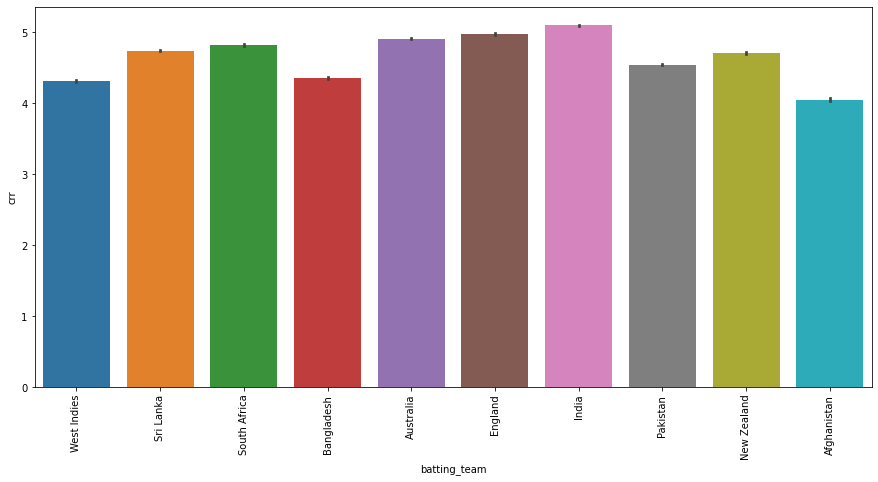

In [92]:
plt.figure(figsize=(15,7))
sn.barplot(final_df['batting_team'],final_df['crr'],estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(final_df['batting_team'],final_df['crr'],estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
print(y_train)

212763    284
325368    206
302053    242
131672    165
321195    284
         ... 
29070     325
123591    289
61233      80
170599    308
63258     162
Name: runs_x, Length: 274368, dtype: int64


In [41]:
y_pred

array([283.90466, 245.37721, 196.5424 , ..., 219.4275 , 345.3002 ,
       222.69646], dtype=float32)

In [115]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [116]:
import xgboost as xg
xg.__version__

'1.5.2'